In [8]:
import pandas as pd
# import numpy
import numpy as np
# import matplotlib
from matplotlib import pyplot as plt
# make plots appear and be stored within the notebook
%matplotlib inline

In [18]:
# 1. Significant earthquakes since 2150 B.C.
# Read the file (e.g., earthquakes-2022-10-18_09-17-48_+0800.tsv) as an object and name it Sig_Eqs.
Sig_Eqs=pd.read_csv('D:\ese5023\earthquakes-2022-11-01_13-50-12_+0800.tsv',header=0, delimiter="\t")
Sig_Eqs

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2150.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,JORDAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6334,NaN,2022.0,9.0,22.0,6.0,16.0,9.0,5861.0,NaN,MEXICO,...,NaN,NaN,3.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN
6335,NaN,2022.0,9.0,30.0,19.0,28.0,40.0,NaN,NaN,INDONESIA,...,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN
6336,NaN,2022.0,10.0,5.0,0.0,21.0,29.0,NaN,NaN,IRAN,...,NaN,NaN,1127.0,4.0,NaN,3.0,NaN,2.0,NaN,3.0
6337,NaN,2022.0,10.0,5.0,8.0,26.0,21.0,NaN,NaN,PERU,...,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# 1.1 [5 points] Compute the total number of deaths caused by earthquakes since 2150 B.C.in each country, 
# and then print the top 20 countries along with the total number of deaths.
Sig_Eqs['Deaths'].sum()

7849109.0

In [25]:
Sig_Eqs.groupby(['Country'])['Deaths'].sum().head(20)

Country
AFGHANISTAN             14254.0
ALBANIA                  3132.0
ALGERIA                 39339.0
ANTARCTICA                  0.0
ANTIGUA AND BARBUDA         0.0
ARGENTINA               22520.0
ARMENIA                191890.0
ATLANTIC OCEAN              0.0
AUSTRALIA                  12.0
AUSTRIA                  5040.0
AZERBAIJAN             317219.0
AZORES (PORTUGAL)        6354.0
BANGLADESH                336.0
BARBADOS                 3000.0
BELGIUM                     2.0
BERING SEA                  0.0
BHUTAN                     11.0
BOLIVIA                   111.0
BOSNIA-HERZEGOVINA         48.0
BRAZIL                      2.0
Name: Deaths, dtype: float64

In [103]:
# 1.2 [10 points] Compute the total number of earthquakes with magnitude larger than 3.0 (use column Ms as the magnitude)
# worldwide each year,and then plot the time series. Do you observe any trend? Explain why or why not?
# Sig_Eqs['year0']=Sig_Eqs['Year'].astype(str)+'/'+Sig_Eqs['Month'].astype(str)+'/'+Sig_Eqs['Day'].astype(str)
                # +Sig_Eqs['Hour'].astype(str)+'/'+Sig_Eqs['Minute'].astype(str)+'/'+Sig_Eqs['Second'].astype(str)
# Sig_Eqs['Year0']=pd.to_datetime(Sig_Eqs['Year'])
# Sig_Eqs.set_index('Year0')
Sig_Eqs['one_earthquake']=1
Sig_Eqs.where(Sig_Eqs['Ms']>3).groupby(['Year'])['one_earthquake'].sum()


Year
-2000.0     1.0
-479.0      1.0
-426.0      1.0
-400.0      1.0
-373.0      1.0
           ... 
 2011.0    30.0
 2012.0    34.0
 2013.0    20.0
 2017.0     1.0
 2019.0     1.0
Name: one_earthquake, Length: 494, dtype: float64

<AxesSubplot:xlabel='Year'>

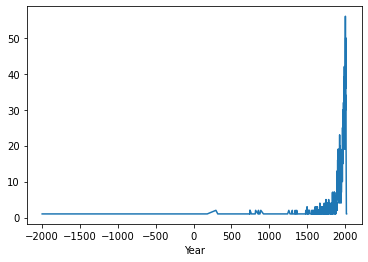

In [105]:
Sig_Eqs.where(Sig_Eqs['Ms']>3).groupby(['Year'])['one_earthquake'].sum().plot()

In [110]:
# 1.3 [10 points] Write a function CountEq_LargestEq that returns 
# (1) the total number of earthquakes since 2150 B.C.in a given country AND 
# (2) date and location of the largest earthquake ever happened in this country. Apply CountEq_LargestEq to every country in the file, 
# report your results in a descending order.

country=input('请输入你的国家：')
    list=Sig_Eqs.groupby(['Country'])['one_earthquake'].sum()
    list0=Sig_Eqs.groupby(['Country']).sort_values("MS", ascending=False),head(1)
    print(list[list.index['country']+[0,1]],list0[list0.index['country']+[0,1]])    

IndentationError: unexpected indent (1251994086.py, line 7)

In [114]:
list=Sig_Eqs.groupby(['Country'])['one_earthquake'].sum()
list

Country
AFGHANISTAN                             62
ALBANIA                                 56
ALGERIA                                 57
ANTARCTICA                               5
ANTIGUA AND BARBUDA                      3
                                        ..
VENEZUELA                               66
VIETNAM                                  5
WALLIS AND FUTUNA (FRENCH TERRITORY)     1
YEMEN                                   10
ZAMBIA                                   1
Name: one_earthquake, Length: 156, dtype: int64

In [120]:
# 2. Air temperature in Shenzhen during the past 25 years
air_tem = pd.read_csv("Baoan_Weather_1998_2022.csv",usecols=['DATE','TMP'])
air_tem

,DATE,TMP
0,1998-01-01T00:00:00,"+0186,1"
1,1998-01-01T01:00:00,"+0220,1"
2,1998-01-01T02:00:00,"+0240,1"
3,1998-01-01T03:00:00,"+0221,1"
4,1998-01-01T04:00:00,"+0240,1"
...,...,...
235669,2022-10-10T20:00:00,"+0210,1"
235670,2022-10-10T21:00:00,"+0201,1"
235671,2022-10-10T21:00:00,"+0200,1"
235672,2022-10-10T22:00:00,"+0200,1"


In [131]:
# import pandas 
import pandas as pd
# import numpy
import numpy as np
# import matplotlib
from matplotlib import pyplot as plt
# make plots appear and be stored within the notebook
%matplotlib inline
air_tem['mon']= pd.to_datetime(air_tem['DATE']).dt.month
air_tem['year']= pd.to_datetime(air_tem['DATE']).dt.year
air_tem

,DATE,TMP,mon,year
0,1998-01-01T00:00:00,"+0186,1",1,1998
1,1998-01-01T01:00:00,"+0220,1",1,1998
2,1998-01-01T02:00:00,"+0240,1",1,1998
3,1998-01-01T03:00:00,"+0221,1",1,1998
4,1998-01-01T04:00:00,"+0240,1",1,1998
...,...,...,...,...
235669,2022-10-10T20:00:00,"+0210,1",10,2022
235670,2022-10-10T21:00:00,"+0201,1",10,2022
235671,2022-10-10T21:00:00,"+0200,1",10,2022
235672,2022-10-10T22:00:00,"+0200,1",10,2022


In [153]:
air_tem = air_tem.join(air_tem['TMP'].str.split(',',1, expand=True)).rename(columns={0:'tem_val',1:'CODE'})
air_tem

,DATE,TMP,mon,year,temp value,CODE,tem_val,CODE,tem_val,CODE,tem_val,CODE,tem_val,CODE,tem_val,CODE,tem_val,CODE,tem_val,CODE
0,1998-01-01T00:00:00,"+0186,1",1,1998,+0186,1,+0186,1,+0186,1,+0186,1,+0186,1,+0186,1,+0186,1,+0186,1
1,1998-01-01T01:00:00,"+0220,1",1,1998,+0220,1,+0220,1,+0220,1,+0220,1,+0220,1,+0220,1,+0220,1,+0220,1
2,1998-01-01T02:00:00,"+0240,1",1,1998,+0240,1,+0240,1,+0240,1,+0240,1,+0240,1,+0240,1,+0240,1,+0240,1
3,1998-01-01T03:00:00,"+0221,1",1,1998,+0221,1,+0221,1,+0221,1,+0221,1,+0221,1,+0221,1,+0221,1,+0221,1
4,1998-01-01T04:00:00,"+0240,1",1,1998,+0240,1,+0240,1,+0240,1,+0240,1,+0240,1,+0240,1,+0240,1,+0240,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235669,2022-10-10T20:00:00,"+0210,1",10,2022,+0210,1,+0210,1,+0210,1,+0210,1,+0210,1,+0210,1,+0210,1,+0210,1
235670,2022-10-10T21:00:00,"+0201,1",10,2022,+0201,1,+0201,1,+0201,1,+0201,1,+0201,1,+0201,1,+0201,1,+0201,1
235671,2022-10-10T21:00:00,"+0200,1",10,2022,+0200,1,+0200,1,+0200,1,+0200,1,+0200,1,+0200,1,+0200,1,+0200,1
235672,2022-10-10T22:00:00,"+0200,1",10,2022,+0200,1,+0200,1,+0200,1,+0200,1,+0200,1,+0200,1,+0200,1,+0200,1


In [ ]:
abnormal = air_tem.sort_values('CODE')['CODE'].loc[air_tem['CODE']!='1']
abnormal.unique()

In [ ]:
air_tem.loc[air_tem['CODE']=='9']
air_tem = air_tem.loc[air_tem['CODE']!='9']
air_tem['TEMPERATURE'] = air_tem['tem_val'].map(int).apply(lambda x:x/10)
air_tem['MONTHS'] = air_tem['year'].map(str) + '-' + air_tem['mon'].map(str)
air_tem

In [180]:
# 3. Global collection of hurricanes
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 2], 
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'])
df.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9600\2709306217.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,,,,main,0,0,__________P___
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,,,,main,0,0,__________P___
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,,,,main,0,0,__________P___
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,,,,main,0,0,__________O___
4,1842298N11080,1842,1,NI,AS,NaN,1842-10-25 18:00:00,NR,10.7884,77.9194,,,,main,0,0,__________P___


In [187]:
# 3.1
df.groupby(['SID'])['WMO_WIND'].max().sort_values(ascending=0).head(10)

SID
2015293N13266    185
1980214N11330    165
1997253N12255    160
2005289N18282    160
2019236N10314    160
1988253N12306    160
1935241N23291    160
1998295N12284    155
2017242N16333    155
2009288N07267    155
Name: WMO_WIND, dtype: int64

<AxesSubplot:>

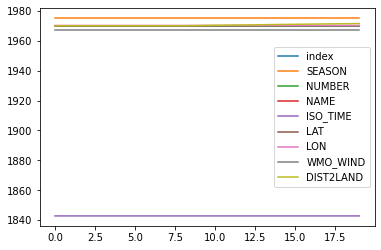

In [196]:
# 3.2
df.reset_index().head(20).plot()

<AxesSubplot:xlabel='BASIN'>

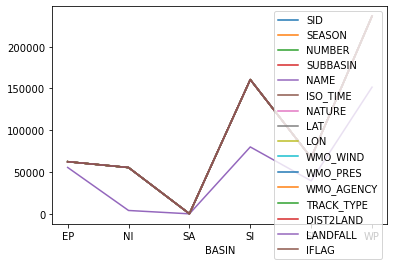

In [200]:
# 3.3
df.groupby(['BASIN']).count().plot()

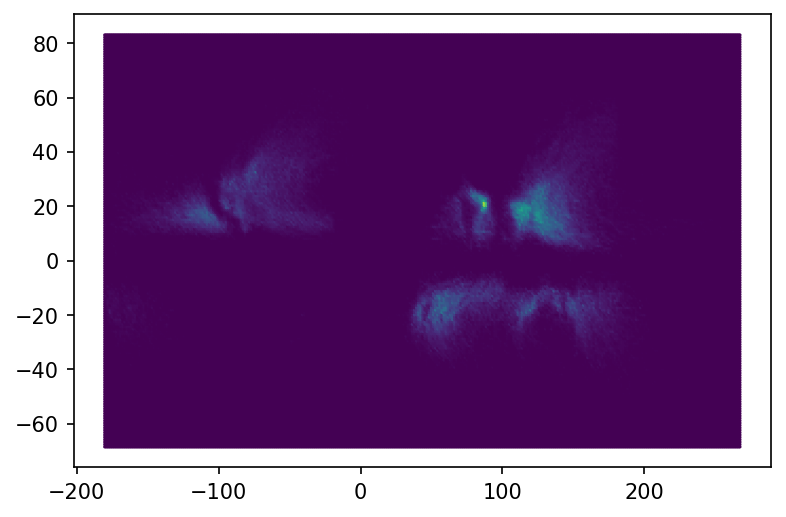

In [205]:
# 3.4
fig, ax = plt.subplots(dpi=150)
ax.hexbin(df['LON'],df['LAT'],gridsize=300)

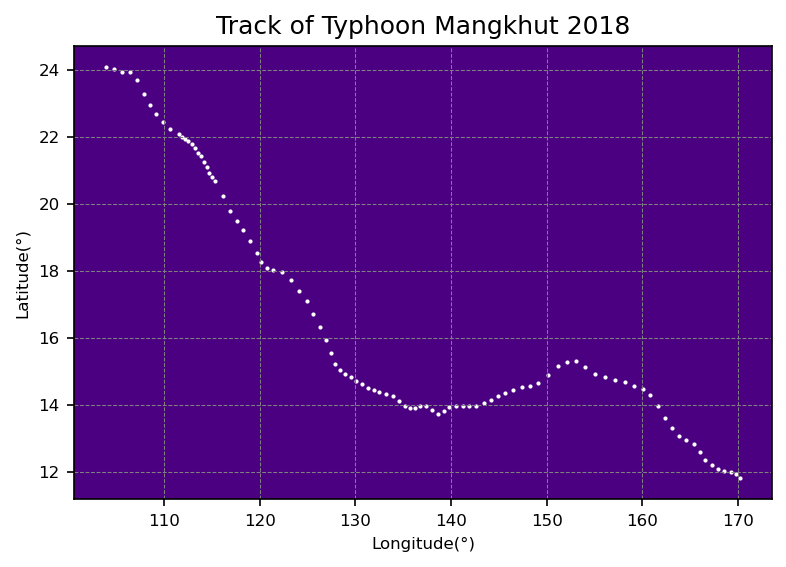

In [209]:
# 3.5
tmk = df.loc[(df['NAME']=='MANGKHUT')&(df['SEASON']==2018)]
fig, ax = plt.subplots(dpi=150)
ax.scatter(tmk['LON'],tmk['LAT'],s = 1,c='1')
ax.set_xlabel('Longitude(°)',fontsize=8)
ax.set_ylabel('Latitude(°)',fontsize=8)
ax.set(title='Track of Typhoon Mangkhut 2018',
      facecolor='indigo')
ax.xaxis.set_tick_params(labelsize=8)
ax.yaxis.set_tick_params(labelsize=8)
ax.grid(color = 'grey', linestyle = 'dashed', linewidth=0.5)

In [210]:
# 3.6
df.loc[(df['SEASON']>1969)&((df['BASIN']=='WP')|(df['BASIN']=='EP'))].copy().head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
350393,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,-999,1006,tokyo,main,1088,1088,_OO___________
350394,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,-999,,,main,1109,1109,_PP___________
350395,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,-999,1002,tokyo,main,1143,1143,_OO___________
350396,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,-999,,,main,1171,1168,_PP___________
350397,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,-999,998,tokyo,main,1182,1179,_OO___________


In [ ]:
# 3.7
df['DATE'] = ndf['ISO_TIME'].dt.date
df.head()